# 🔌 Accessing Macroeconomic Data via APIs

`MacroPy` provides built-in functions to seamlessly retrieve macroeconomic data from two key sources:

+ `get_bcrp_data()`: Connects to the API of the Central Reserve Bank of Peru (BCRP) to download official Peruvian macroeconomic indicators.
+ `get_fred_data()`: Interfaces with the Federal Reserve Economic Data (FRED) API to access a wide range of global and U.S. economic variables.

These functions make it easy to integrate up-to-date economic data directly into your Python workflows for analysis, modeling, or forecasting.

## 1. Domestic data from BCRP

In [2]:
import pandas as pd
from MacroPy import get_bcrp_data

monthly_codes = ['PN38915BM', # Índice de precios de exportación
                 'PN38923BM', # Términos de intercambio
                 'PN01773AM', # Real GDP - Monthly (index 2007=100, Seasonally adjusted)
                 'PN38705PM', # Índice de Precios al Consumidor (IPC)
                 'PD04722MM', # Tasa de Referencia de la Política Monetaria
                 'PN07819NM', # Tasa interbancaria promedio
                 'PN01210PM', # Tipo de cambio bancario promedio
                 'PD38045AM', # Indice de expectativas de la economía a 3 meses
                 'PN01758AM', # Producción de pesca (indice 2007=100)  
                 'PN38689FM'] # Ingresos corrientes del GG (términos reales)  

df_monthly_bcrp = get_bcrp_data(monthly_codes, start_period='1996-1')
df_monthly_bcrp.columns = ['date', 'tpm', 'exp3m', 'tc', 'pesca', 'pbi', 'int', 'icgg', 'ipc', 'ipx', 'tdi']
df_monthly_bcrp['date'] = pd.to_datetime(df_monthly_bcrp['date'])
df_monthly_bcrp.head()

,date,tpm,exp3m,tc,pesca,pbi,int,icgg,ipc,ipx,tdi
0,2003-09-01,2.75,57.485030,3.480864,14.776418,78.347351,2.77,4484.806282,58.435976,43.079438,63.753886
1,2003-10-01,2.75,60.207101,3.478205,71.701914,78.908142,2.71,4438.095524,58.464629,43.152882,63.201738
2,2003-11-01,2.50,58.682635,3.477750,109.281400,75.209304,2.60,4806.916023,58.562665,45.984491,66.830148
3,2003-12-01,2.50,59.023669,3.471286,42.249642,75.752133,2.51,5057.817941,58.892929,46.035715,65.205497
4,2004-01-01,2.50,54.517134,3.467167,52.988151,78.091980,2.41,4715.010358,59.209448,48.554216,66.953575


## 2. External data from St. Louis Fred

You can generate your FRED API Key [here](https://fred.stlouisfed.org/docs/api/api_key.html)

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("FRED_KEY") 

In [4]:
from MacroPy import get_fred_data

series_codes = ['VIXCLS', 'DFF', 'INDPRO', 'CPIAUCSL']
series_names = ['vix', 'fed', 'indpro', 'uscpi']
df_monthly_fred = get_fred_data(series_codes, series_names, 'm', api_key, start_period='1996-1')
df_monthly_fred.head()

,date,vix,fed,indpro,uscpi
0,1996-01-01,13.47,5.56,72.5712,154.7
1,1996-02-01,15.03,5.22,73.6207,155.0
2,1996-03-01,17.76,5.31,73.5141,155.5
3,1996-04-01,16.58,5.22,74.2491,156.1
4,1996-05-01,16.15,5.24,74.8142,156.4


## 3. Merge domestic and external monthly data

In [5]:
df_monthly = df_monthly_bcrp.merge(df_monthly_fred, how='left', on='date')
df_monthly.head()

,date,tpm,exp3m,tc,pesca,pbi,int,icgg,ipc,ipx,tdi,vix,fed,indpro,uscpi
0,2003-09-01,2.75,57.485030,3.480864,14.776418,78.347351,2.77,4484.806282,58.435976,43.079438,63.753886,19.53,1.01,91.3819,185.1
1,2003-10-01,2.75,60.207101,3.478205,71.701914,78.908142,2.71,4438.095524,58.464629,43.152882,63.201738,18.02,1.01,91.5049,184.9
2,2003-11-01,2.50,58.682635,3.477750,109.281400,75.209304,2.60,4806.916023,58.562665,45.984491,66.830148,17.40,1.00,92.1265,185.0
3,2003-12-01,2.50,59.023669,3.471286,42.249642,75.752133,2.51,5057.817941,58.892929,46.035715,65.205497,16.83,0.98,92.1732,185.5
4,2004-01-01,2.50,54.517134,3.467167,52.988151,78.091980,2.41,4715.010358,59.209448,48.554216,66.953575,16.10,1.00,92.3268,186.3


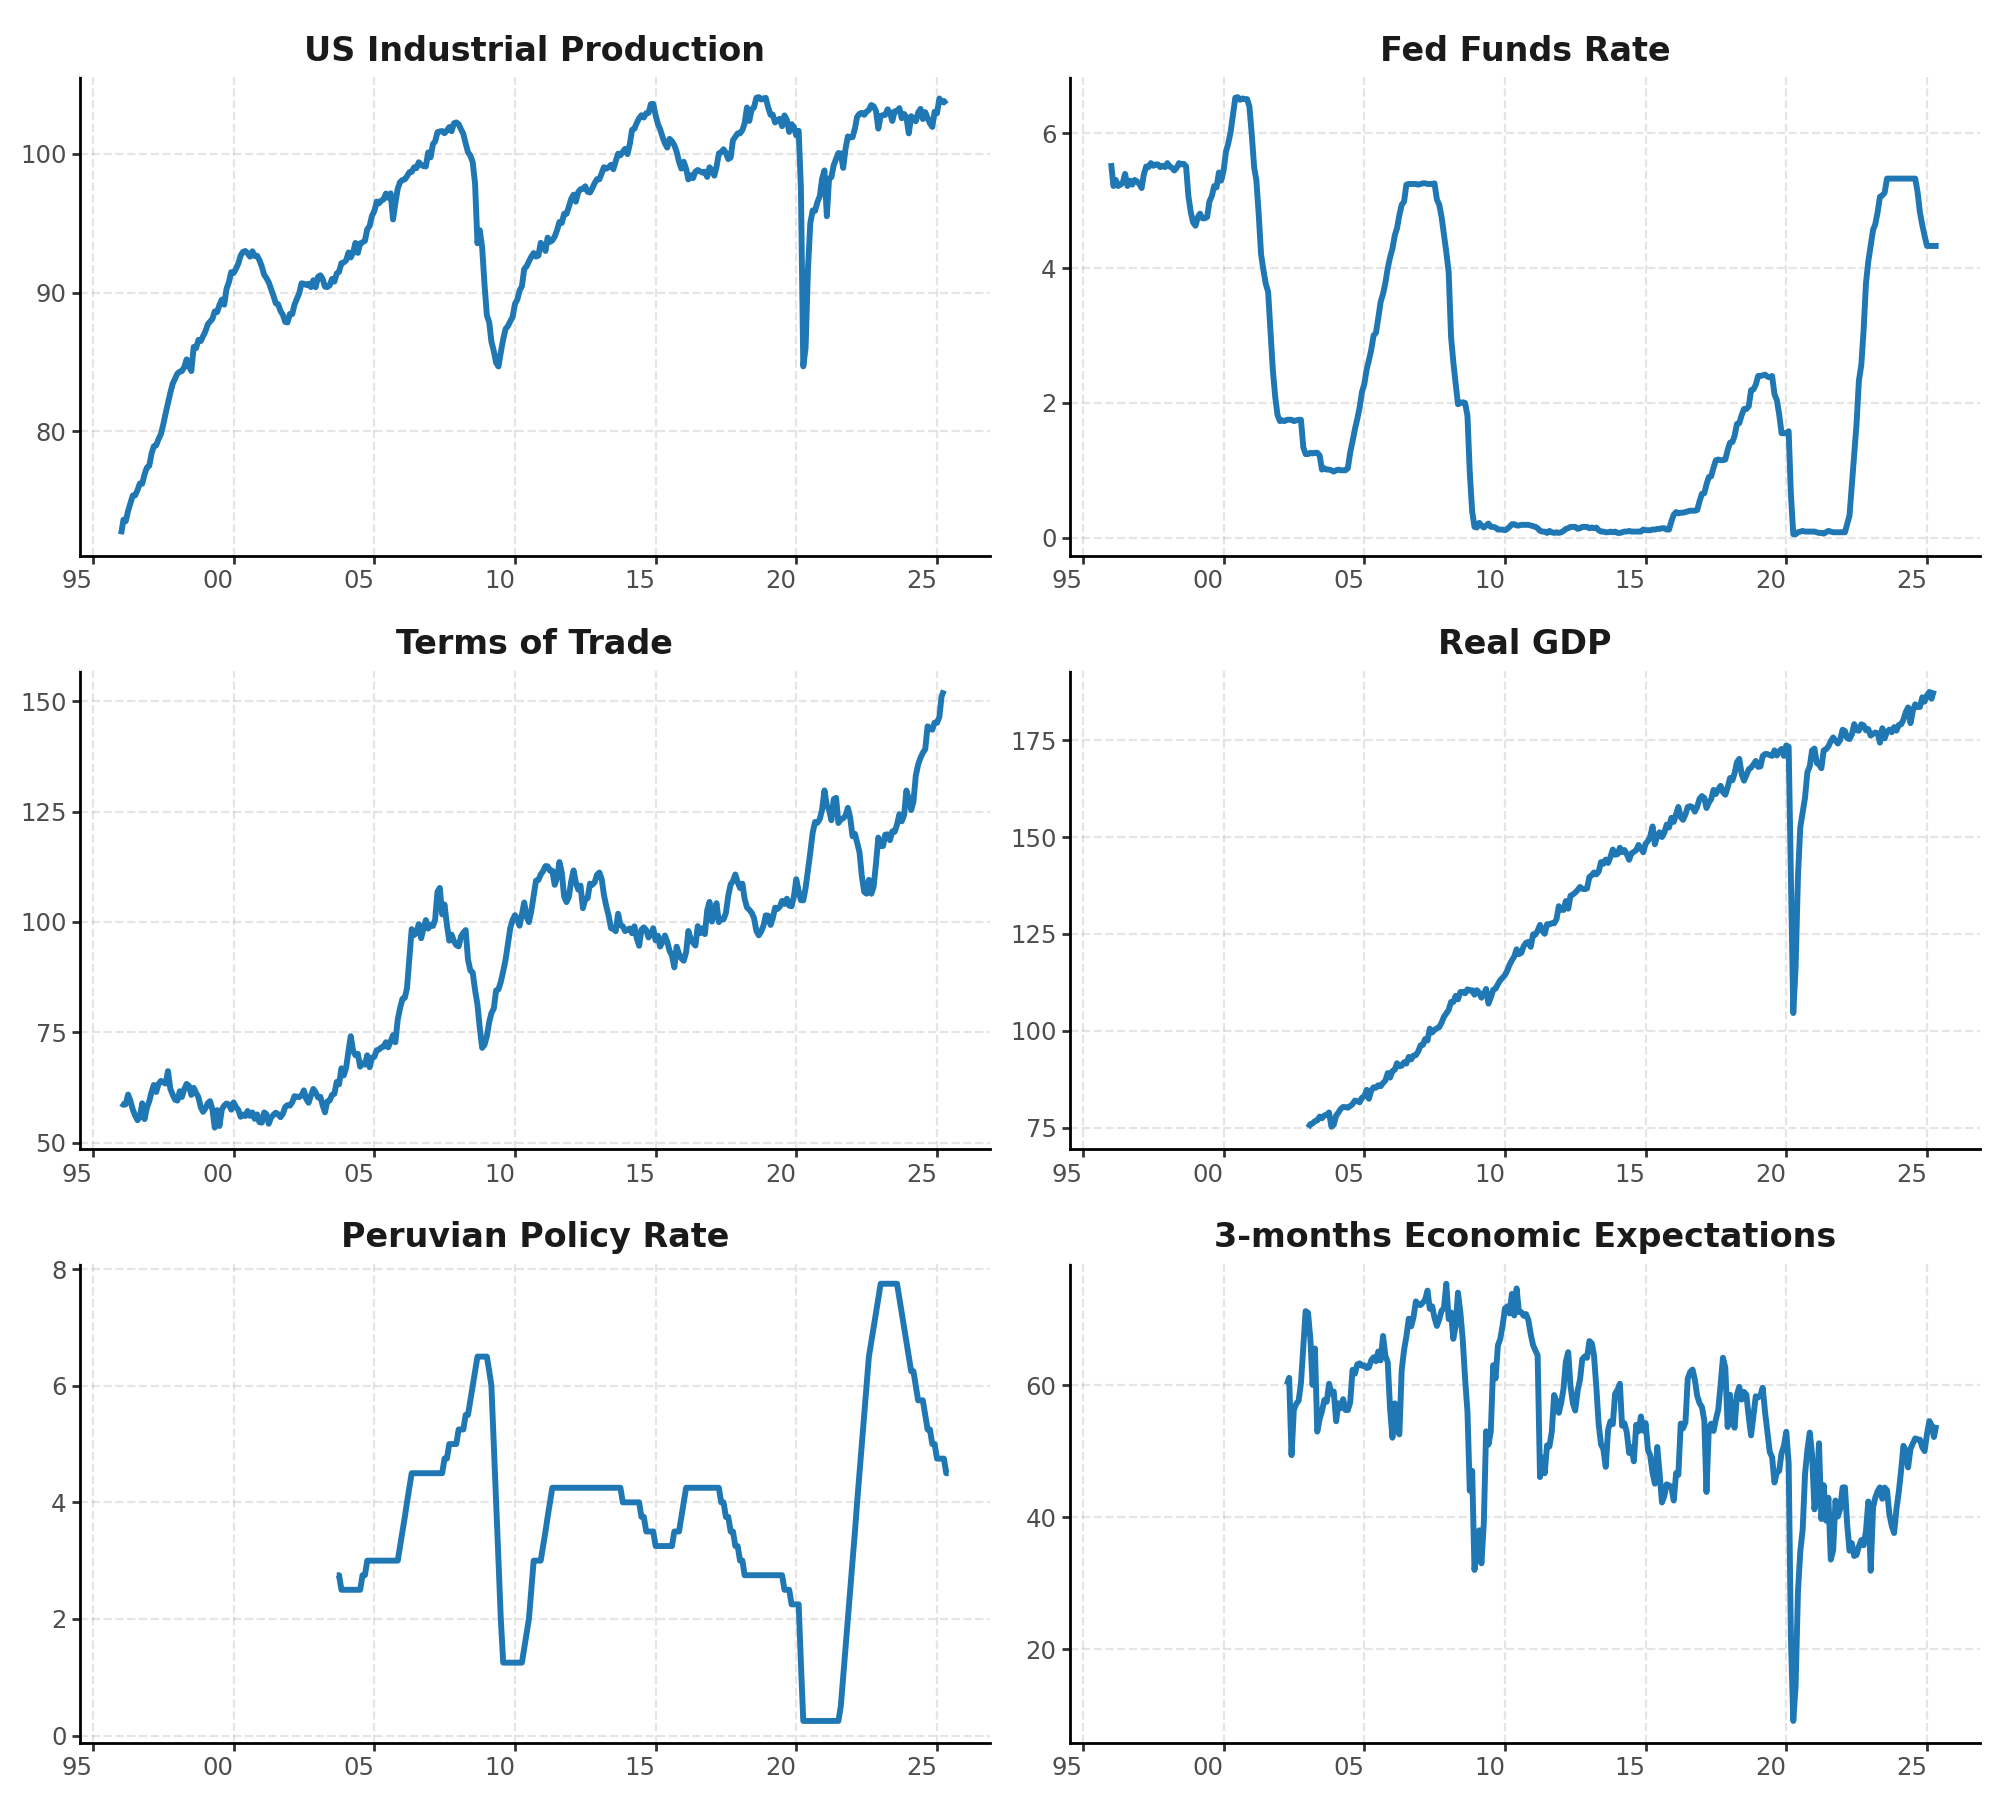

In [6]:
from MacroPy import generate_series_plot

series_names = ['indpro', 'fed', 'tdi', 'pbi', 'tpm', 'exp3m']
series_titles = ['US Industrial Production', 'Fed Funds Rate', 'Terms of Trade', 
                 'Real GDP', 'Peruvian Policy Rate', '3-months Economic Expectations']
generate_series_plot(yy=df_monthly[series_names], yy_dates=df_monthly["date"], series_titles=series_titles)